In [1]:
#importing relevant libraries for the my analysis
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.set()

In [2]:
raw_data = pd.read_csv(r'C:\Users\singh\Downloads\train_ctrUa4K.csv')
raw_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
raw_data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002140,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [4]:
cleaned_data = raw_data.dropna()

In [5]:
cleaned_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


In [6]:
cleaned_data =cleaned_data.reset_index(drop=True)

In [7]:
cleaned_data.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480.000000,480,480
unique,480,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002140,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,394,311,274,383,414,NaN,NaN,NaN,NaN,NaN,191,332
mean,NaN,NaN,NaN,NaN,NaN,NaN,5364.231250,1581.093583,144.735417,342.050000,0.854167,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,5668.251251,2617.692267,80.508164,65.212401,0.353307,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,36.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2898.750000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3859.000000,1084.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5852.500000,2253.250000,170.000000,360.000000,1.000000,NaN,NaN


In [8]:
cleaned_data['Education']=cleaned_data['Education'].map({'Graduate':1, 'Not Graduate':0})

In [9]:
cleaned_data['Self_Employed']=cleaned_data['Self_Employed'].map({'Yes':1, 'No':0})

In [10]:
cleaned_data['Gender']=cleaned_data['Gender'].map({'Male':1, 'Female':0})

In [11]:
cleaned_data['Married']=cleaned_data['Married'].map({'Yes':1, 'No':0})

In [12]:
cleaned_data['Property_Area']=cleaned_data['Property_Area'].map({'Urban':2, 'Semiurban':1,'Rural':0})
cleaned_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
1,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y
2,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
3,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Y
4,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,Y
5,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,Y
6,LP001014,1,1,3+,1,0,3036,2504.0,158.0,360.0,0.0,1,N
7,LP001018,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,2,Y
8,LP001020,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,1,N
9,LP001024,1,1,2,1,0,3200,700.0,70.0,360.0,1.0,2,Y


Text(0, 0.5, 'total numbers of loan approved')

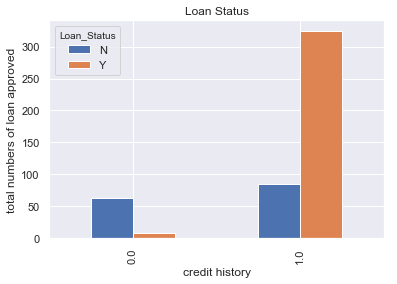

In [13]:
pd.crosstab(cleaned_data.Credit_History,cleaned_data.Loan_Status).plot(kind='bar')
plt.title('Loan Status')
plt.xlabel('credit history')
plt.ylabel('total numbers of loan approved')

Text(0, 0.5, 'total numbers of loan approved')

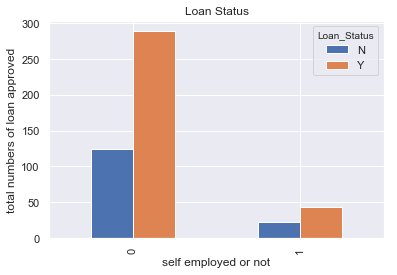

In [14]:
pd.crosstab(cleaned_data.Self_Employed,cleaned_data.Loan_Status).plot(kind='bar')
plt.title('Loan Status')
plt.xlabel('self employed or not')
plt.ylabel('total numbers of loan approved')

Text(0, 0.5, 'total numbers of loan approved')

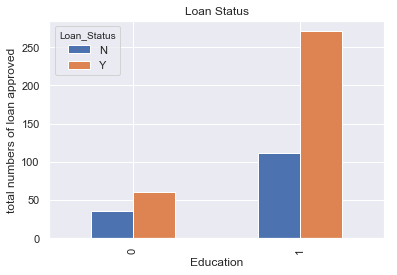

In [15]:
pd.crosstab(cleaned_data.Education,cleaned_data.Loan_Status).plot(kind='bar')
plt.title('Loan Status')
plt.xlabel('Education')
plt.ylabel('total numbers of loan approved')

Text(0, 0.5, 'total numbers of loan approved')

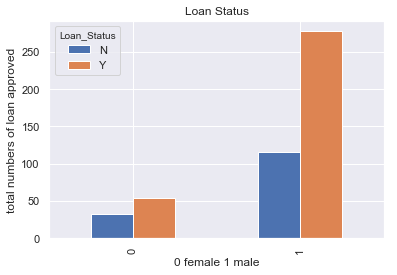

In [16]:
pd.crosstab(cleaned_data.Gender,cleaned_data.Loan_Status).plot(kind='bar')
plt.title('Loan Status')
plt.xlabel('0 female 1 male')
plt.ylabel('total numbers of loan approved')

Text(0, 0.5, 'total numbers of loan approved')

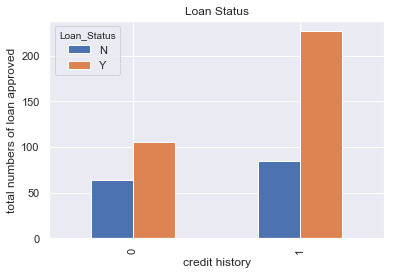

In [17]:
pd.crosstab(cleaned_data.Married,cleaned_data.Loan_Status).plot(kind='bar')
plt.title('Loan Status')
plt.xlabel('credit history')
plt.ylabel('total numbers of loan approved')

Text(0, 0.5, 'total numbers of loan approved')

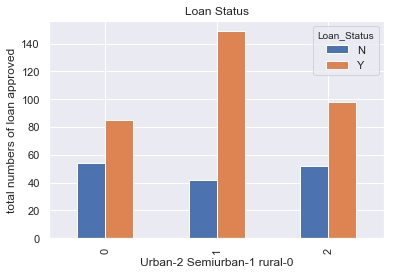

In [18]:
pd.crosstab(cleaned_data.Property_Area,cleaned_data.Loan_Status).plot(kind='bar')
plt.title('Loan Status')
plt.xlabel('Urban-2 Semiurban-1 rural-0')
plt.ylabel('total numbers of loan approved')

In [19]:
from sklearn.linear_model import LogisticRegression


In [22]:
y=cleaned_data['Loan_Status']
x1=cleaned_data[['Credit_History','Property_Area','Education','ApplicantIncome']]

In [25]:
logmodel = LogisticRegression()
logmodel.fit(x1,y)

C:\Users\singh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
train_data = pd.read_csv(r'C:\Users\singh\Downloads\train_ctrUa4K.csv')
train_data = train_data.dropna()
train_data['Property_Area']=train_data['Property_Area'].map({'Urban':2, 'Semiurban':1,'Rural':0})

In [33]:
train_data['Education']=train_data['Education'].map({'Graduate':1, 'Not Graduate':0})

In [34]:
x_test = train_data[['Credit_History','Property_Area','Education','ApplicantIncome']]

In [35]:
Predictions = logmodel.predict(x_test)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y,Predictions))


              precision    recall  f1-score   support

           N       0.90      0.43      0.58       148
           Y       0.79      0.98      0.88       332

   micro avg       0.81      0.81      0.81       480
   macro avg       0.85      0.70      0.73       480
weighted avg       0.83      0.81      0.78       480

